In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from collections import Counter
import nltk 
from nltk.corpus import stopwords

In [22]:
# Read the data and check for missing values and dupes:
df = pd.read_csv('linkedin_jobs.csv')
df=pd.DataFrame(df)
df.drop('Unnamed: 0',axis=1,inplace=True) 
print('Number of missing values:\n', df.isnull().sum())
print('Number of duplicates:',df.duplicated().sum())
len(df)
 

Number of missing values:
 job_title           0
company_name        0
location            0
workplace_type    310
job_posted          0
job_desc            0
dtype: int64
Number of duplicates: 10


707

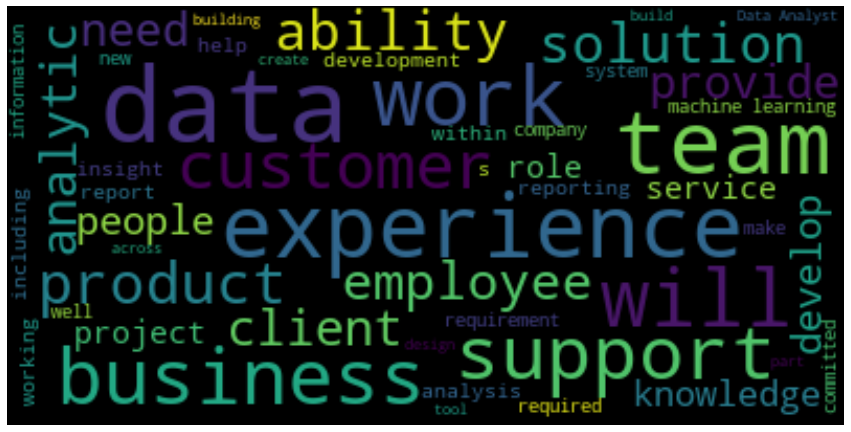

In [3]:
# Stopwords:
text = df.job_desc.values
stopwords=set(STOPWORDS)
stopwords.update(['data', 'team', 'solution', 'experience', 'service', 'develop', 'product'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=50, max_words=50).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
""" def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

wordBarGraphFunction(df, 'job_desc', 'Popular Words in Linkedin Job Postings') """

' def wordBarGraphFunction(df,column,title):\n    topic_words = [ z.lower() for y in\n                       [ x.split() for x in df[column] if isinstance(x, str)]\n                       for z in y]\n    word_count_dict = dict(Counter(topic_words))\n    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)\n    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]\n    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])\n    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))\n    plt.title(title)\n    plt.show()\n\nwordBarGraphFunction(df, \'job_desc\', \'Popular Words in Linkedin Job Postings\') '

{'Power BI': 171, 'Tableau': 214, 'Python': 387, 'R': 707, 'Excel': 407, 'Matlab': 20, 'SAS': 154, 'Java': 84, 'JavaScript': 19}


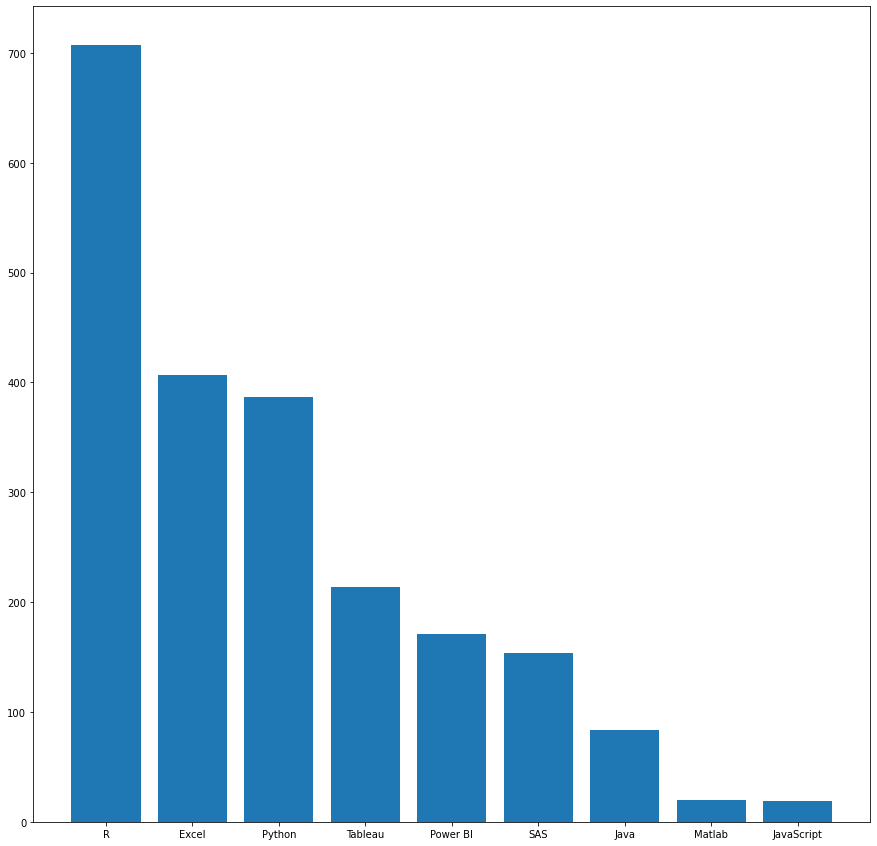

In [40]:
# Get count of instances of keywords:
keylist=['Power BI', 'PowerBI', 'Tableau', 'Python', 'R', 'Excel', 'Matlab', 'SAS', 'Java', 'JavaScript']
dict={}

for keyword in range(0,len(keylist)):
    count=df[['job_desc']].apply(lambda row: row.astype(str).str.contains(keylist[keyword], case=False).any(), axis=1).sum()
    dict[keylist[keyword]]=count

# Sum counts of Power BI:
pbi = dict.get('Power BI')+dict.get('PowerBI')
dict.update({'Power BI':pbi})
dict.pop('PowerBI', None)

# Sort dictionary:
sort = sorted(dict.items(),key=lambda item:item[1], reverse=True)
dictsort = {k: v for k, v in sort}

# Plot:
keys = (dictsort.keys())
values = (dictsort.values())
plt.bar(keys, values)
plt.show()  
